# 필기 숫자 인식
## LeNet-5 재현
* C-P-C-P-C-FC-FC 구조

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 14s - loss: 0.2126 - accuracy: 0.9360 - val_loss: 0.0506 - val_accuracy: 0.9825 - 14s/epoch - 29ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0401 - val_accuracy: 0.9870 - 2s/epoch - 4ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0287 - val_accuracy: 0.9900 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0277 - val_accuracy: 0.9910 - 2s/epoch - 4ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0212 - accuracy: 0.9929 - val_loss: 0.0380 - val_accuracy: 0.9875 - 2s/epoch - 4ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0317 - val_accuracy: 0.9904 - 2s/epoch - 4ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0306 - val_accuracy: 0.9914 - 2s/epoch - 4ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0470 -

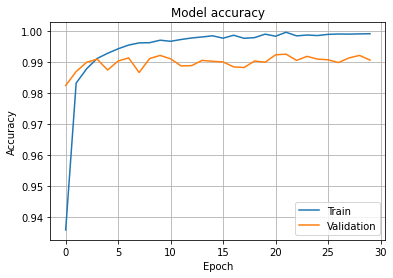

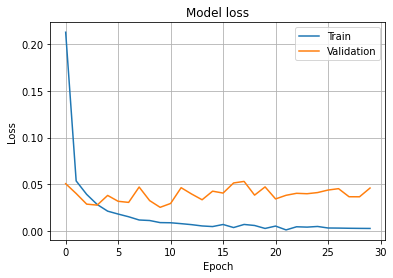

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# LeNet-5 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 정확률 계산
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

* C-C-P-FC-FC 구조

Epoch 1/12
469/469 - 5s - loss: 0.2406 - accuracy: 0.9272 - val_loss: 0.0474 - val_accuracy: 0.9838 - 5s/epoch - 11ms/step
Epoch 2/12
469/469 - 4s - loss: 0.0873 - accuracy: 0.9739 - val_loss: 0.0389 - val_accuracy: 0.9864 - 4s/epoch - 8ms/step
Epoch 3/12
469/469 - 4s - loss: 0.0631 - accuracy: 0.9810 - val_loss: 0.0326 - val_accuracy: 0.9892 - 4s/epoch - 8ms/step
Epoch 4/12
469/469 - 4s - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.0289 - val_accuracy: 0.9903 - 4s/epoch - 8ms/step
Epoch 5/12
469/469 - 4s - loss: 0.0437 - accuracy: 0.9864 - val_loss: 0.0303 - val_accuracy: 0.9902 - 4s/epoch - 8ms/step
Epoch 6/12
469/469 - 4s - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0259 - val_accuracy: 0.9921 - 4s/epoch - 8ms/step
Epoch 7/12
469/469 - 4s - loss: 0.0343 - accuracy: 0.9887 - val_loss: 0.0268 - val_accuracy: 0.9916 - 4s/epoch - 8ms/step
Epoch 8/12
469/469 - 4s - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0273 - val_accuracy: 0.9918 - 4s/epoch - 8ms/step
Epoch 9/12
469/469 - 4s

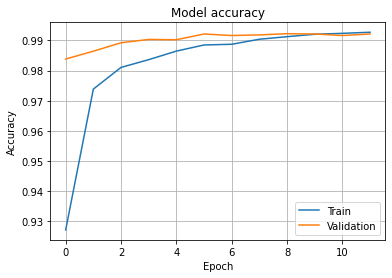

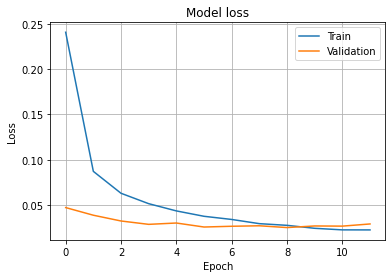

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

# 정활률 계산
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()


# 패션 인식

4431872/4422102 [==============================] - 0s 0us/step
Epoch 1/12
469/469 - 4s - loss: 0.5217 - accuracy: 0.8155 - val_loss: 0.3374 - val_accuracy: 0.8769 - 4s/epoch - 10ms/step
Epoch 2/12
469/469 - 4s - loss: 0.3427 - accuracy: 0.8772 - val_loss: 0.2984 - val_accuracy: 0.8877 - 4s/epoch - 8ms/step
Epoch 3/12
469/469 - 4s - loss: 0.2948 - accuracy: 0.8940 - val_loss: 0.2671 - val_accuracy: 0.9022 - 4s/epoch - 8ms/step
Epoch 4/12
469/469 - 4s - loss: 0.2633 - accuracy: 0.9050 - val_loss: 0.2532 - val_accuracy: 0.9079 - 4s/epoch - 8ms/step
Epoch 5/12
469/469 - 4s - loss: 0.2367 - accuracy: 0.9137 - val_loss: 0.2326 - val_accuracy: 0.9147 - 4s/epoch - 8ms/step
Epoch 6/12
469/469 - 4s - loss: 0.2152 - accuracy: 0.9207 - val_loss: 0.2317 - val_accuracy: 0.9176 - 4s/epoch - 8ms/step
Epoch 7/12
469/469 - 4s - loss: 0.2016 - accuracy: 0.9253 - val_loss: 0.2197 - val_accuracy: 0.9205 - 4s/epoch - 8ms/step
Epoch 8/12
469/469 - 4s - loss: 0.1854 - accuracy: 0.9312 - val_loss: 0.2190 - val

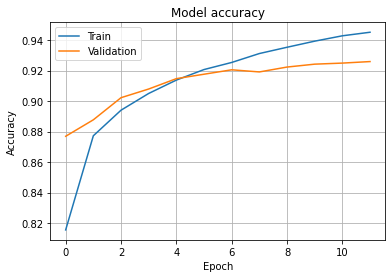

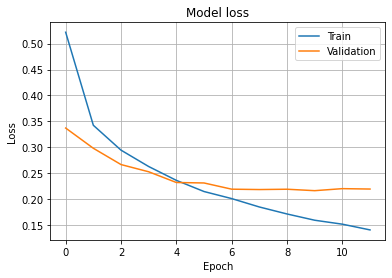

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()


# 자연 영상 인식

170508288/170498071 [==============================] - 6s 0us/step
Epoch 1/30
391/391 - 5s - loss: 1.6949 - accuracy: 0.3725 - val_loss: 1.3613 - val_accuracy: 0.5040 - 5s/epoch - 13ms/step
Epoch 2/30
391/391 - 4s - loss: 1.3170 - accuracy: 0.5230 - val_loss: 1.1371 - val_accuracy: 0.5939 - 4s/epoch - 9ms/step
Epoch 3/30
391/391 - 4s - loss: 1.1266 - accuracy: 0.5991 - val_loss: 0.9907 - val_accuracy: 0.6497 - 4s/epoch - 10ms/step
Epoch 4/30
391/391 - 4s - loss: 0.9911 - accuracy: 0.6476 - val_loss: 0.9031 - val_accuracy: 0.6856 - 4s/epoch - 10ms/step
Epoch 5/30
391/391 - 4s - loss: 0.9000 - accuracy: 0.6816 - val_loss: 0.8072 - val_accuracy: 0.7171 - 4s/epoch - 10ms/step
Epoch 6/30
391/391 - 4s - loss: 0.8374 - accuracy: 0.7049 - val_loss: 0.7538 - val_accuracy: 0.7389 - 4s/epoch - 9ms/step
Epoch 7/30
391/391 - 4s - loss: 0.7866 - accuracy: 0.7238 - val_loss: 0.7431 - val_accuracy: 0.7420 - 4s/epoch - 10ms/step
Epoch 8/30
391/391 - 4s - loss: 0.7498 - accuracy: 0.7348 - val_loss: 0.74

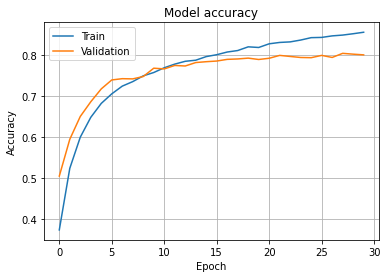

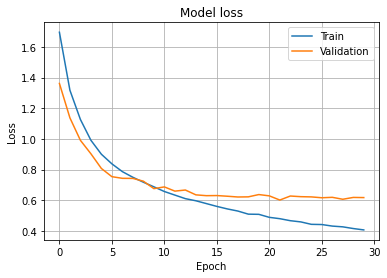

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 정확률 계산
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='best')
plt.grid()
plt.show()


# 학습된 모델 저장과 재활용


In [5]:
cnn.save("my_cnn.h5")

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# 신경망 구조와 가중치를 저장하고 있는 파일을 읽어 옴
cnn=tf.keras.models.load_model("my_cnn.h5")
cnn.summary()

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      